In [1]:
import cv2
import os.path
import tensorflow as tf
import helper
import tests as tests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import random
import re

/anaconda/envs/carnd-term1/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


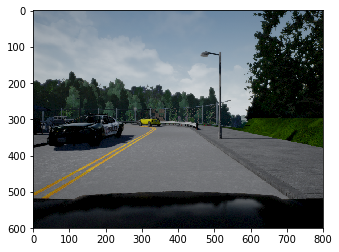

In [2]:
image = mpimg.imread('../lyft_data/Train/CameraRGB/75.png')
plt.imshow(image)

(600, 800)


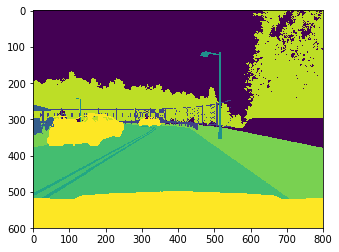

In [7]:
#label_image= mpimg.imread('lyft_training_data/CameraSeg/75.png')
label_image= mpimg.imread('../lyft_data/Train/CameraSeg/75.png')
label_image_r = label_image[:,:,0]
label_image_g = label_image[:,:,1]
label_image_b = label_image[:,:,2]
print(label_image_r.shape)
plt.imshow(label_image_r)

(500, 800)


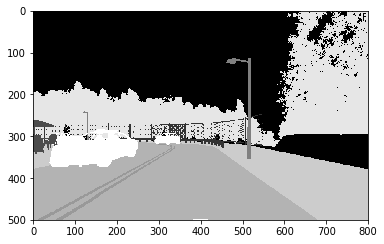

In [8]:
label_image_r = label_image_r[:500,:]
plt.imshow(label_image_r,cmap='gray')
print(label_image_r.shape)

In [59]:
def gen_batch_function(data_folder, image_shape):
    """
    Generate function to create batches of training data
    :param data_folder: Path to folder that contains all the datasets
    :param image_shape: Tuple - Shape of image
    :return:
    """
    def get_batches_fn(batch_size):
        """
        Create batches of training data
        :param batch_size: Batch Size
        :return: Batches of training data
        """
        image_paths = glob(os.path.join(data_folder, 'CameraRGB', '*.png'))
        #label_paths = glob(os.path.join(data_folder, 'CameraSeg', '*.png'))
        label_paths = {
            re.sub(r'_(lane|road)_', '_', os.path.basename(path)): path
            for path in glob(os.path.join(data_folder, 'CameraSeg', '*.png'))}
        background_color = np.array([255, 0, 0])

        random.shuffle(image_paths)
        for batch_i in range(0, len(image_paths), batch_size):
            
            images = []
            gt_images = []
            for image_file in image_paths[batch_i:batch_i+batch_size]:
                gt_image_file = label_paths[os.path.basename(image_file)]
                
                #fig = plt.figure()
                #plt.subplot(121)
                #image = scipy.misc.imresize(scipy.misc.imread(image_file), image_shape)
                #gt_image = scipy.misc.imresize(scipy.misc.imread(gt_image_file), image_shape)
                
                #plt.imshow(mpimg.imread(image_file))
                #print(np.shape(mpimg.imread(image_file)))
                #print(image_shape)
                image = cv2.resize(mpimg.imread(image_file), image_shape)
                
                #plt.subplot(122)
                #plt.imshow(image)
                #print(np.shape(image))
                
                gt_image = cv2.resize(mpimg.imread(gt_image_file), image_shape)

                gt_bg = np.all(gt_image == background_color, axis=2)
                gt_bg = gt_bg.reshape(*gt_bg.shape, 1)
                gt_image = np.concatenate((gt_bg, np.invert(gt_bg)), axis=2)

                images.append(image)
                gt_images.append(gt_image)

            yield np.array(images), np.array(gt_images)
    return get_batches_fn

Tests Passed
(600, 800, 3)
(576, 160)
(160, 576, 3)
(600, 800, 3)
(576, 160)
(160, 576, 3)


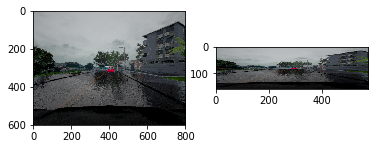

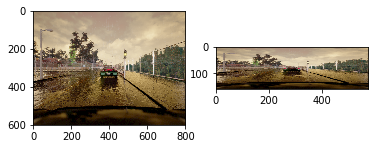

In [61]:
#image_shape = (160, 576)
image_shape = (576, 160)
data_dir = '../lyft_data'
#runs_dir = './runs'
tests.test_for_training_dataset(data_dir)

# Download pretrained vgg model
helper.check_pretrained_vgg(data_dir)

# Path to vgg model
vgg_path = os.path.join(data_dir, 'vgg')

# Create function to get batches
get_batches_fn = gen_batch_function(os.path.join(data_dir, 'Train'), image_shape)

images, labels =next(get_batches_fn(2))